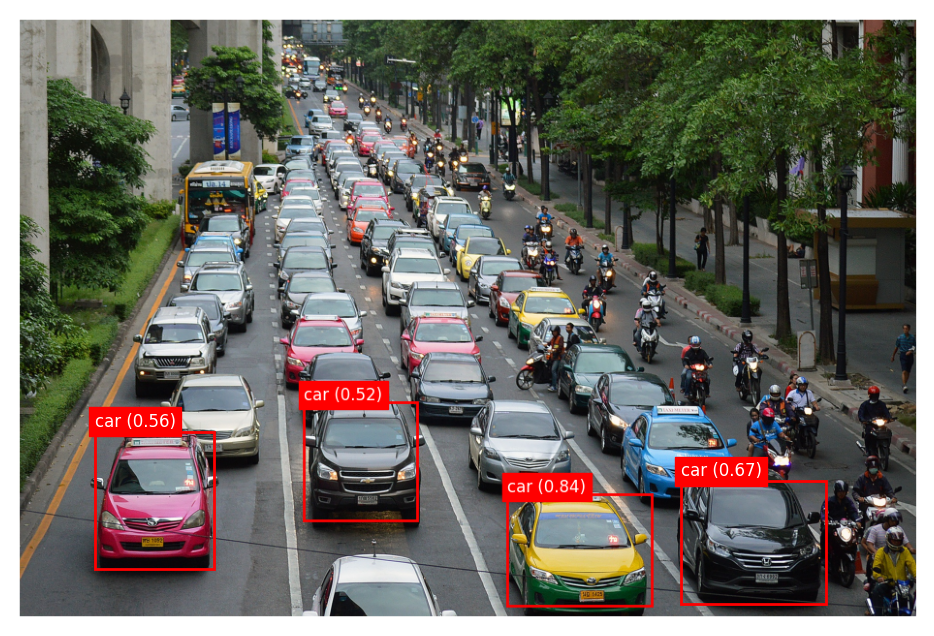

In [ ]:
import torch
from torchvision.models.detection import ssdlite320_mobilenet_v3_large
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load pre-trained SSD model
model = ssdlite320_mobilenet_v3_large(pretrained=True)
model.eval()

# Load and preprocess input image (simulate self-driving car camera)
img_path = "/content/CV EXP 7 OP.png"  # Replace with your image path
image = Image.open(img_path).convert("RGB")
img_tensor = F.to_tensor(image)

# Inference
with torch.no_grad():
    prediction = model([img_tensor])[0]

# Load COCO class labels
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
    'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Visualization
def visualize(image, prediction, threshold=0.5):
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    ax = plt.gca()

    for i in range(len(prediction["boxes"])):
        score = prediction["scores"][i].item()
        if score > threshold:
            box = prediction["boxes"][i].cpu().numpy()
            label = COCO_INSTANCE_CATEGORY_NAMES[prediction["labels"][i]]
            ax.add_patch(patches.Rectangle((box[0], box[1]),
                                           box[2] - box[0],
                                           box[3] - box[1],
                                           linewidth=2, edgecolor='red', facecolor='none'))
            ax.text(box[0], box[1] - 5,
                    f"{label} ({score:.2f})", color='white',
                    fontsize=12, backgroundcolor="red")
    plt.axis('off')
    plt.show()

# Show result
visualize(image, prediction)







